In [61]:
#import libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [40]:
#load data
df=pd.read_csv('TRAINING_DATASET.csv')
df.head()


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [42]:
#missing values
df.isnull().sum()
df=df.dropna(subset=['CustomerID'])

#numerical column
num_col=['Age','Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend']
for col in num_col:
    df[col].fillna(df[col].median(),inplace=True)

cat_col=['Gender', 'Subscription Type', 'Last Interaction','Contract Length']
for col in cat_col:
    df[col].fillna(df[col].mode()[0],inplace=True)

# Target column (Churn) - drop rows with missing labels
df=df.dropna(subset=['Churn'])

C:\Users\nishi\AppData\Local\Temp\ipykernel_20588\2875505483.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(),inplace=True)
C:\Users\nishi\AppData\Local\Temp\ipykernel_20588\2875505483.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [43]:
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [44]:
#label encoding
LabelEncoding=LabelEncoder()
df['Gender']=LabelEncoding.fit_transform(df['Gender'])
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 440832 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  int64  
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), int64(1), object(2)
memory usage: 43.7+ MB


In [ ]:
#onehot encoding
df = pd.get_dummies(df, columns=['Contract Length', 'Subscription Type'], drop_first=True)

bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440832 entries, 0 to 440832
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  440832 non-null  float64
 1   Age                         440832 non-null  float64
 2   Gender                      440832 non-null  int64  
 3   Tenure                      440832 non-null  float64
 4   Usage Frequency             440832 non-null  float64
 5   Support Calls               440832 non-null  float64
 6   Payment Delay               440832 non-null  float64
 7   Total Spend                 440832 non-null  float64
 8   Last Interaction            440832 non-null  float64
 9   Churn                       440832 non-null  float64
 10  Contract Length_Monthly     440832 non-null  int64  
 11  Contract Length_Quarterly   440832 non-null  int64  
 12  Subscription Type_Premium   440832 non-null  int64  
 13  Subscription Type_S

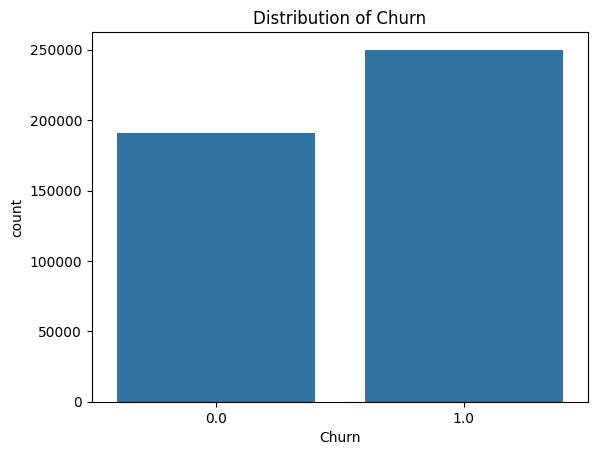

In [52]:
#visualization
sns.countplot(x='Churn', data=df)
plt.title("Distribution of Churn")
plt.show()


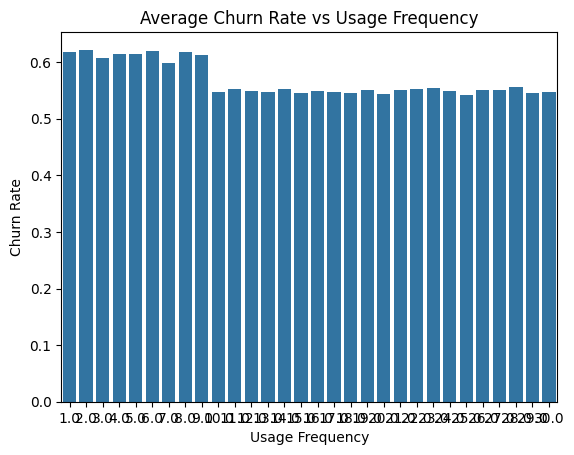

In [55]:
#churn vs usage freq
usage_churn = df.groupby('Usage Frequency', as_index=False)['Churn'].mean()


# If Usage Frequency is categorical or binned
sns.barplot(data=usage_churn, x='Usage Frequency', y='Churn')
plt.title("Average Churn Rate vs Usage Frequency")
plt.ylabel("Churn Rate")
plt.show()

C:\Users\nishi\AppData\Local\Temp\ipykernel_20588\1081891013.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn = df.groupby('Tenure_bin', as_index=False)['Churn'].mean()


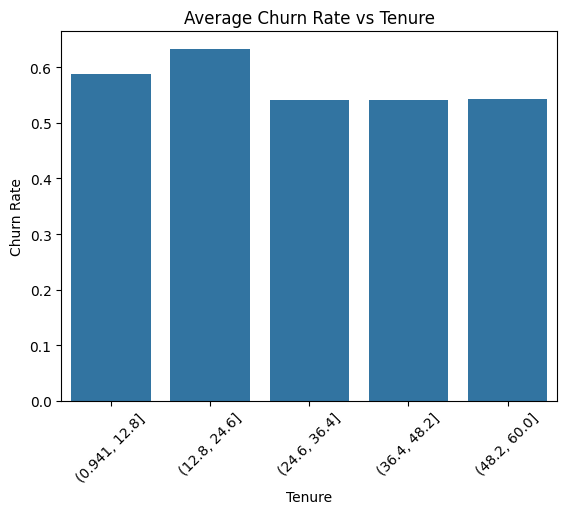

In [56]:
#tenure vs churn
df['Tenure_bin'] = pd.cut(df['Tenure'], bins=5)
tenure_churn = df.groupby('Tenure_bin', as_index=False)['Churn'].mean()


sns.barplot(data=tenure_churn, x='Tenure_bin', y='Churn')
plt.title("Average Churn Rate vs Tenure")
plt.xlabel("Tenure")
plt.ylabel("Churn Rate")
plt.xticks(rotation=45)
plt.show()


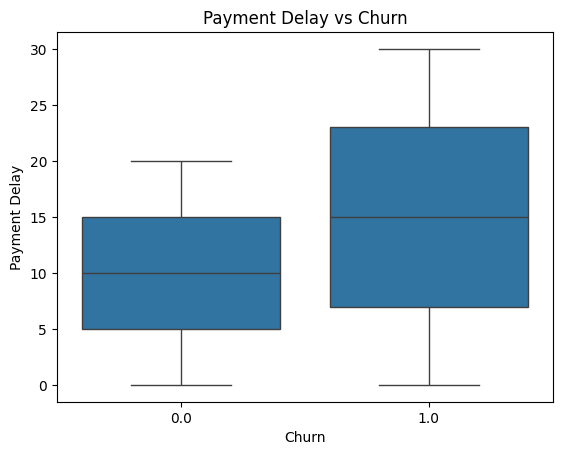

In [57]:
#payment delay vs churn

sns.boxplot(x='Churn', y='Payment Delay', data=df)
plt.title("Payment Delay vs Churn")
plt.show()


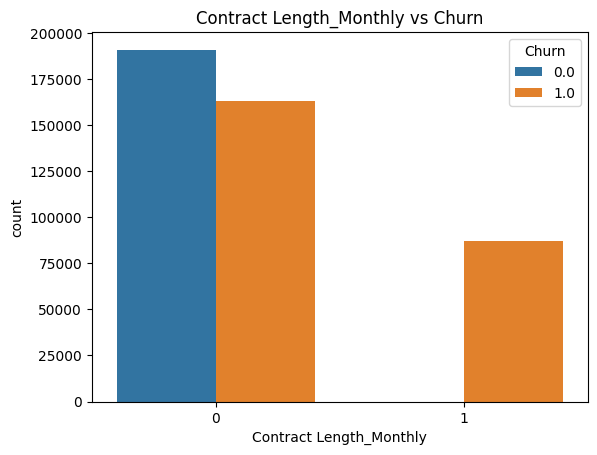

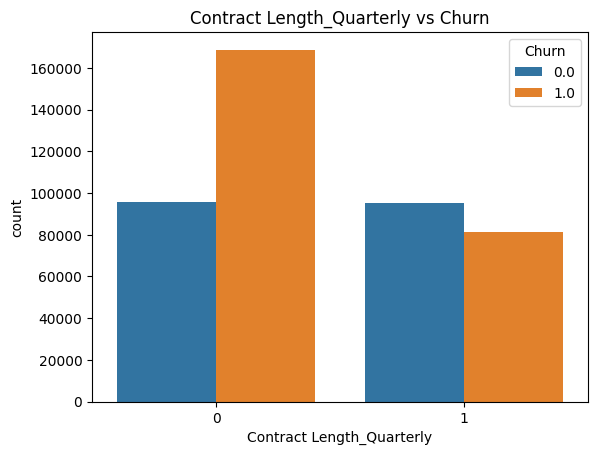

In [58]:
#contract length vs churn
contract_cols = ['Contract Length_Monthly', 'Contract Length_Quarterly']

for col in contract_cols:
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f"{col} vs Churn")
    plt.show()


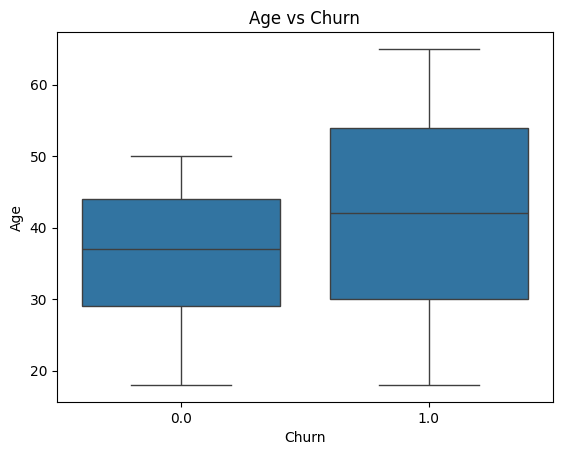

In [65]:
#age vs churn
sns.boxplot(x='Churn', y='Age', data=df)
plt.title("Age vs Churn")
plt.show()


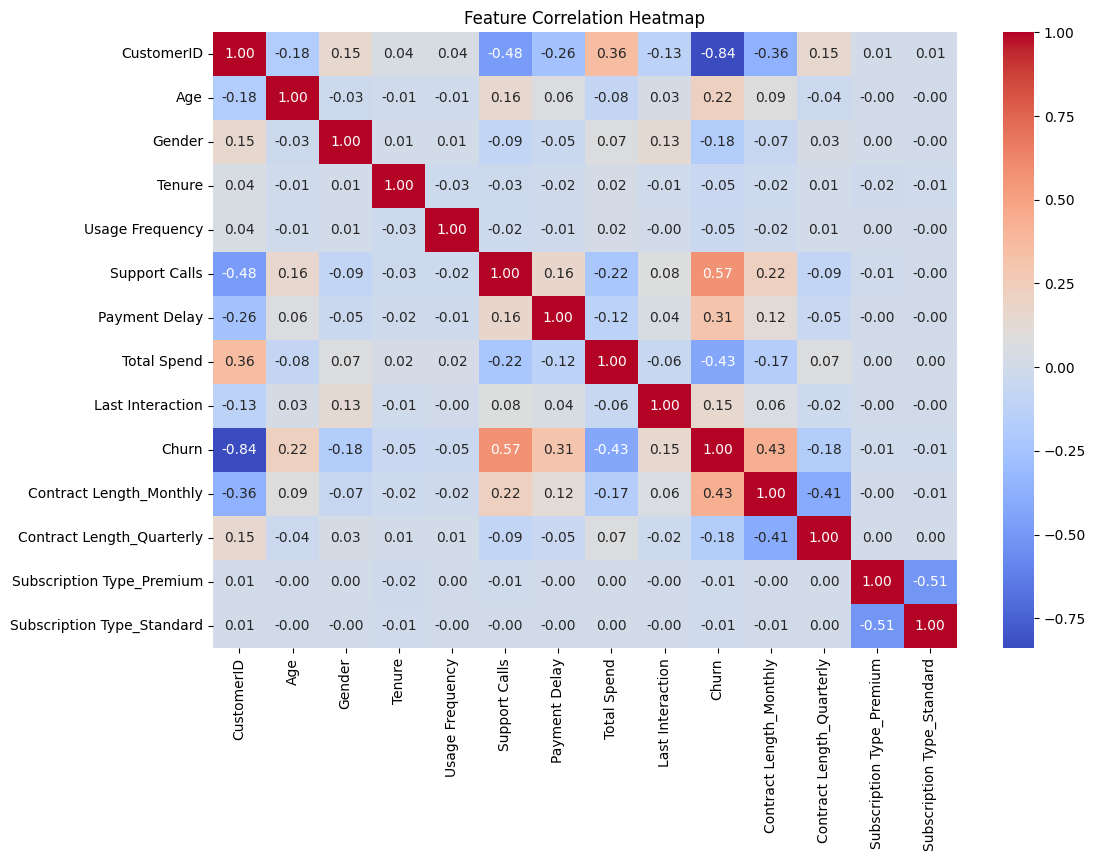

In [60]:
#correlation
df_corr = df.drop(columns=['Tenure_bin', 'Usage_bin'], errors='ignore')

plt.figure(figsize=(12,8))
sns.heatmap(df_corr.corr(), annot=True, fmt=".2f", cmap="coolwarm")


plt.title("Feature Correlation Heatmap")
plt.show()


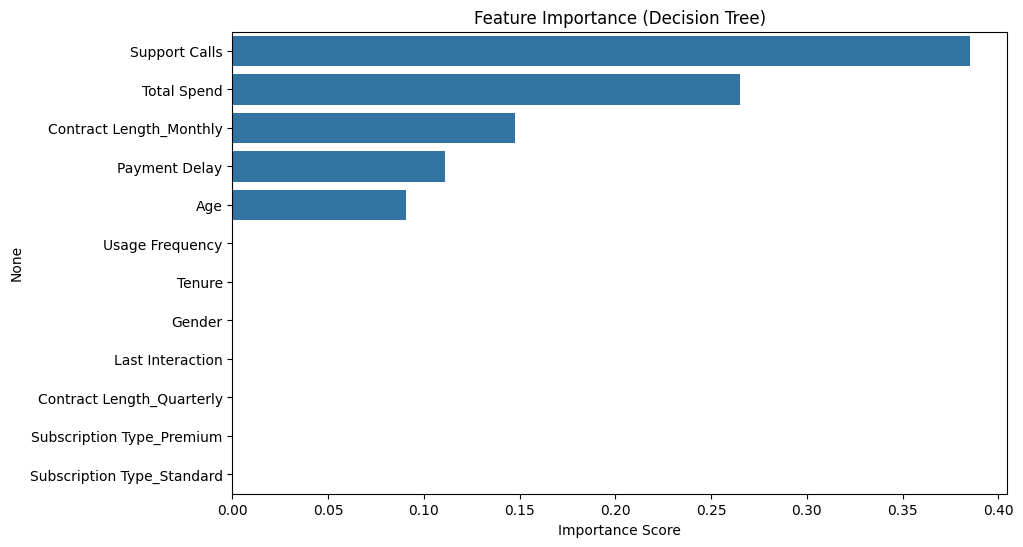

In [ ]:
#feature importance
importance = pd.Series(dt.feature_importances_, index=X.columns)
importance = importance.sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=importance.values, y=importance.index)
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance Score")
plt.show()

In [ ]:
#split train test

X = df.select_dtypes(include=['number', 'bool']).drop(['CustomerID', 'Churn'], axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#train the model
dt = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=50,
    random_state=42
)

dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,50
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [ ]:
#evaluation

y_pred = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9775085916499371
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     38063
         1.0       1.00      0.96      0.98     50104

    accuracy                           0.98     88167
   macro avg       0.98      0.98      0.98     88167
weighted avg       0.98      0.98      0.98     88167

